# Problem 3
Compound A diffuses through a 4-cm long tube and reacts as it diffuses. The equation governing diffusion with reaction is

    D*((d**2)*A/(dx**2)) − kA = 0.

At one end of the tube, there is a large source of A at a concentration of 0.1 M. At the other end of the tube there is an adsorbent material that quickly absorbs any A, making the concentration 0 M. If (D = 1.5 * 10**(−6)cm2/s, k = (5 × 10**−6)s −1, compute the concentration of A as a function of distance in the tube. Solve using the shooting method or finite difference method.

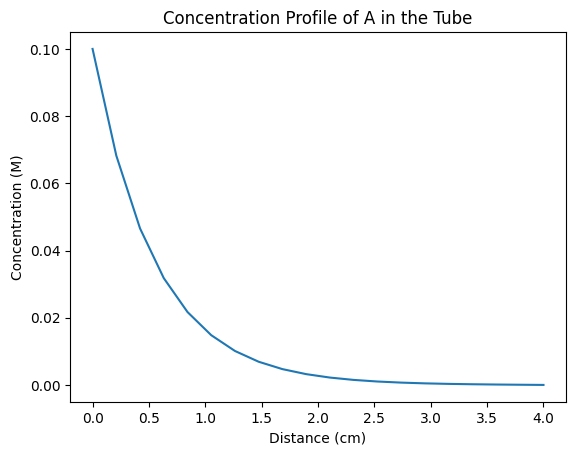

In [9]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.5 * (10**(-6))
k = 5 * (10**(-6))
L = 4.0
C0 = 0.1
C4 = 0.0
N = 20
delta_x = L / (N-1)
x = np.linspace(0, L, N)

matx_A = np.zeros((N, N))
matx_A[0, 0] = 1
C = np.zeros(N)
C[0] = C0

c=(k*(delta_x**2))/D
for i in range(1, N-1):
    matx_A[i, i-1] = 1
    matx_A[i, i] = - c - 2
    matx_A[i, i+1] = 1
matx_A[N-1, N-1] = 1
C[N-1] = C4

def gauss_seidel(a, b, x=None, tol=1 * (10**(-10)), max_iter=1000):
    n = len(a)
    x = x or [0] * n
    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            x[i] = (b[i] - sum(a[i][j] * x[j] for j in range(n) if j != i)) / a[i][i]
        if all(abs(x[i] - x_new[i]) < tol for i in range(n)):
            return x

c = gauss_seidel(matx_A, C)
plt.plot(x, c)
plt.xlabel('Distance (cm)')
plt.ylabel('Concentration (M)')
plt.title('Concentration Profile of A in the Tube')
plt.show()

# D = 1.5 * (10**(-6))
# k = 5 * (10**(-6))
# initial_concentration = 0.1
# L = 4.0
# boundary_concentration = 0.0
# N = 20
# delta_x = L / N
# x = np.linspace(0, L, N+1)

# A = np.zeros(N+1)

# A[0] = initial_concentration

# for i in range(1, N):
#     A[i+1] = 2 * A[i] - A[i-1] + (k / D) * delta_x**2 * A[i]

# A[N] = boundary_concentration

# plt.plot(x, A)
# plt.xlabel('Distance (cm)')
# plt.ylabel('Concentration (M)')
# plt.title('Concentration of A vs. Distance in the Tube')
# plt.grid(True)
# plt.show()